In [1]:
import os
import pandas as pd
import seaborn as sn
import numpy as np
import sklearn as sk
import matplotlib as mpl
import plotly.express as px
import missingno as msno
import plotly as ply
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import where
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv('January_Schiphol_Time_Groups.csv')
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [3]:
# The target variable
df['Time_Group'].unique()

array(['Morning_Rush_Hour', 'Between_Rush_hours', 'Afternoon_Rush_hour',
       'Night', 'Early_Morning'], dtype=object)

In [4]:
# Day of week one hot encoding
dummies = pd.get_dummies(df)

In [5]:
dummies

,Unnamed: 0,Train_Number,Train_Delay,MaxNumberOfStops,weekday,Train_Departure_Planned_Time,Station_Code_AH,Station_Code_ALM,Station_Code_AMF,Station_Code_AMFS,...,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Time_Group_Afternoon_Rush_hour,Time_Group_Between_Rush_hours,Time_Group_Early_Morning,Time_Group_Morning_Rush_Hour,Time_Group_Night
0,0,3528,0.0,10,4,64400,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,3524,0.0,10,4,64800,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,3528,0.0,10,4,70000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1624,0.0,10,4,70200,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,3524,0.0,10,4,70900,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,1684,0.0,13,6,225300,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
76311,76311,11686,0.0,6,6,231000,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
76312,76312,11686,0.0,6,6,234000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
76313,76313,11686,0.0,6,6,234600,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [11]:
df['Monday'] = dummies['day_of_week_Monday']
df['Tuesday'] = dummies['day_of_week_Tuesday']
df['Wednesday'] = dummies['day_of_week_Wednesday']
df['Thrusday'] = dummies['day_of_week_Thursday']
df['Friday'] = dummies['day_of_week_Friday']
df['Saturday'] = dummies['day_of_week_Saturday']
df['Sunday'] = dummies['day_of_week_Sunday']

df['Afternoon_Rush_Hour'] = dummies['Time_Group_Afternoon_Rush_hour']
df['Between_Rush_Hours'] = dummies['Time_Group_Between_Rush_hours']
df['Early_Morning'] = dummies['Time_Group_Early_Morning']
df['Morning_Rush_Hour'] = dummies['Time_Group_Morning_Rush_Hour']
df['Night'] = dummies['Time_Group_Night']

df['Time_Group_Target'] = df['Time_Group'].map({"Morning_Rush_Hour":0,"Between_Rush_Hours":1,"Early_Morning":2,"Morning_Rush_Hour":3,"Night":4})

In [28]:
df.iloc[:,0:15]

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,Sunday,234600,Night


In [25]:
# df = df.drop(["weekday"], axis=1)

# df.to_csv("January_OneHotEncoded.csv")

In [29]:
x = df[['Train_Delay','Monday','Thrusday','Wednesday','Tuesday','Friday','Saturday','Sunday','MaxNumberOfStops','Train_Departure_Planned_Time']]
y = df['Time_Group_Target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [44]:
# Define number of clusters by setting distance threshold
agglom = AgglomerativeClustering(distance_threshold=2000000, n_clusters=None)

# Use this line for agglomerative clustering using normalized data
agglom.fit(x_train)

AgglomerativeClustering(distance_threshold=2000000, n_clusters=None)

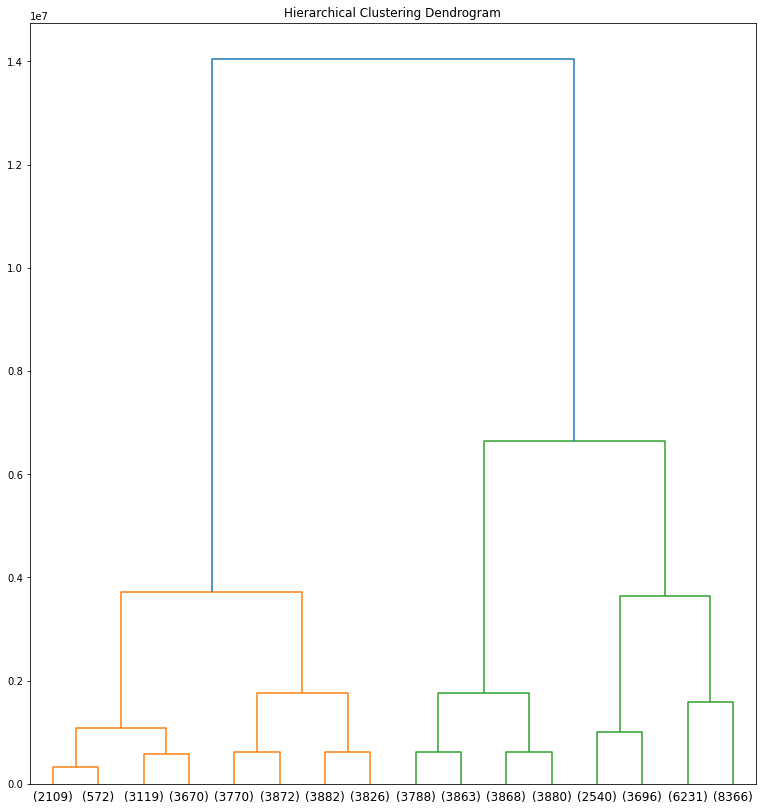

In [46]:
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(13,14))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agglom, truncate_mode='level', p=3)
plt.show()

In [47]:
# Amount of clusters
# +1 because it starts from 0
print('Found clusters count: {}'.format(agglom.labels_.max() + 1))

Found clusters count: 5


In [35]:
print(len(agglom.labels_))

61052


In [48]:
print(len(x_train))

61052


In [49]:
df2 = x_train
df2['Cluster'] = agglom.labels_

df2

,Train_Delay,Monday,Thrusday,Wednesday,Tuesday,Friday,Saturday,Sunday,MaxNumberOfStops,Train_Departure_Planned_Time,Cluster
37780,0.0,0,0,0,0,0,1,0,8,81600,1
29229,0.0,0,0,1,0,0,0,0,7,51600,3
72972,0.0,0,0,0,0,0,1,0,10,114000,1
37625,0.0,0,0,0,0,0,1,0,10,83000,1
16184,0.0,0,1,0,0,0,0,0,6,222300,4
...,...,...,...,...,...,...,...,...,...,...,...
21243,161.0,0,0,0,0,0,1,0,7,214300,4
45891,72.0,0,0,0,1,0,0,0,10,120000,0
42613,85.0,1,0,0,0,0,0,0,8,81200,1
43567,0.0,1,0,0,0,0,0,0,11,133000,0


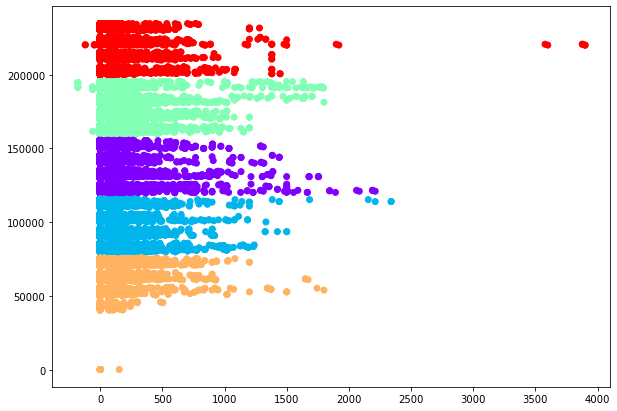

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train['Train_Delay'], x_train['Train_Departure_Planned_Time'], c=agglom.labels_, cmap='rainbow')

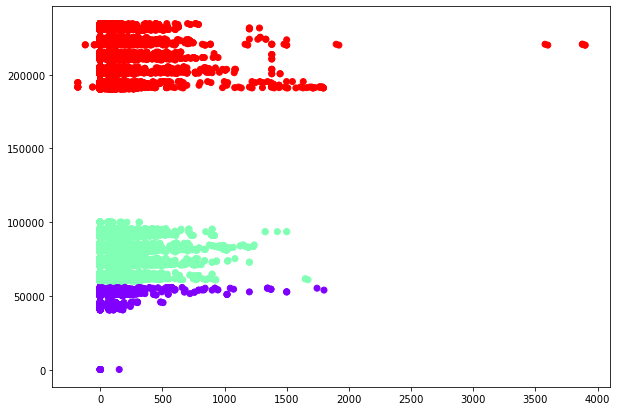

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train['Train_Delay'], x_train['Train_Departure_Planned_Time'], c=y_train, cmap='rainbow')